In [1]:
## NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

##One Hot Decoding

from keras.utils import to_categorical
from keras.models import Sequential  
import Sastrawi

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [3]:
train_url = 'https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/train_preprocess.csv'
valid_url = 'https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/valid_preprocess.csv'
test_url = 'https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/test_preprocess.csv'

In [6]:
from sympy import Le


def makeDataset(test,train,valid):
    test = pd.read_csv(test, sep=',', header=None,nrows=300)
    train = pd.read_csv(train, sep=',', header=None,nrows=20)
    valid = pd.read_csv(valid, sep=',', header=None,nrows=20)
    train.index, test.index, valid.index = np.arange(1,len(train)+1), np.arange(1,len(test)+1), np.arange(1,len(valid)+1)
    train.columns, test.columns, valid.columns = ['label','tweet'], ['label','tweet'], ['label','tweet']
    return test,train,valid

def Preprocessing_toLowerCase(test,train,valid):
    test['tweet'] = test['tweet'].apply(lambda x: x.lower())
    train['tweet'] = train['tweet'].apply(lambda x: x.lower())
    valid['tweet'] = valid['tweet'].apply(lambda x: x.lower())
    return test,train,valid

def Stemming(test,train,valid):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    test['tweet'] = test['tweet'].apply(lambda x: stemmer.stem(x))
    train['tweet'] = train['tweet'].apply(lambda x: stemmer.stem(x))
    valid['tweet'] = valid['tweet'].apply(lambda x: stemmer.stem(x))
    return test,train,valid

def takeAllText(test,train,valid):
    test_text = test['tweet'].values
    train_text = train['tweet'].values
    valid_text = valid['tweet'].values
    return test_text,train_text,valid_text

def takeAllLabel(test,train,valid):
    test_label = test['label'].values
    train_label = train['label'].values
    valid_label = valid['label'].values
    return test_label,train_label,valid_label


def oneHotEncoding(test_label,train_label,valid_label):
    Le = LabelEncoder()
    train_label = Le.fit_transform(train_label) 
    test_label = Le.fit_transform(test_label)
    valid_label = Le.fit_transform(valid_label)
    oneHot_train_label = to_categorical(train_label)
    oneHot_test_label = to_categorical(test_label)
    oneHot_valid_label = to_categorical(valid_label)
    return oneHot_test_label,oneHot_train_label,oneHot_valid_label


def Tokenizing(test_text,train_text,valid_text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_text)
    tokenizer.fit_on_texts(valid_text)
    tokenizer.fit_on_texts(test_text)
    sequence_train = tokenizer.texts_to_sequences(train_text)
    sequence_valid = tokenizer.texts_to_sequences(valid_text)
    sequence_test = tokenizer.texts_to_sequences(test_text)
    return sequence_test,sequence_train,sequence_valid

In [7]:
df_test,df_train,df_valid = makeDataset(test_url,train_url,valid_url)
df_train.shape,df_test.shape,df_valid.shape
df_test,df_train,df_valid = Preprocessing_toLowerCase(df_test,df_train,df_valid)
df_test,df_train,df_valid = Stemming(df_test,df_train,df_valid)
df_train.head()

,label,tweet
1,label,tweet
2,happy,ini adalah hal yang paling bahagia saat bias f...
3,anger,username username dari pertama username duduk ...
4,fear,yaudah kalo emang belum berani potong rambut p...
5,fear,jadi malam gw rekap eh inti yg gw usahain kerj...


In [9]:

train_sentences,test_sentences,valid_sentences = takeAllText(df_test,df_train,df_valid)
label_test,label_train,label_valid = takeAllLabel(df_test,df_train,df_valid)
Encode_label_test,Encode_label_train,Encode_label_valid = oneHotEncoding(label_test,label_train,label_valid)
sequence_test,sequence_train,sequence_valid = Tokenizing(train_sentences,test_sentences,valid_sentences)


In [10]:
max_length = 0

for i in sequence_train:
    if len(i) > max_length:
        max_length = len(i)

for i in sequence_valid:
    if len(i) > max_length:
        max_length = len(i)

for i in sequence_test:
    if len(i) > max_length:
        max_length = len(i)
max_length

train_padded = pad_sequences(sequence_train, maxlen=max_length, padding='post', truncating='post')
valid_padded = pad_sequences(sequence_valid, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(sequence_test, maxlen=max_length, padding='post', truncating='post')

print(Encode_label_train)
print(Encode_label_valid)


[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [13]:
import keras as ks
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
model = Sequential()

model.add(Embedding(4000, 16, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))   
model.add(Dense(6, activation='softmax'))

model.compile(loss=ks.losses.CategoricalCrossentropy(), optimizer=ks.optimizers.Adam(), metrics=['accuracy'])

model.summary()

num_epochs = 100

history = model.fit(train_padded, Encode_label_train, epochs=num_epochs, 
                    validation_data=(valid_padded, Encode_label_valid))

print(train_padded.shape,Encode_label_train.shape,valid_padded.shape,Encode_label_valid.shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 51, 16)            64000     
                                                                 
 lstm_2 (LSTM)               (None, 128)               74240     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
Total params: 148774 (581.15 KB)
Trainable params: 148

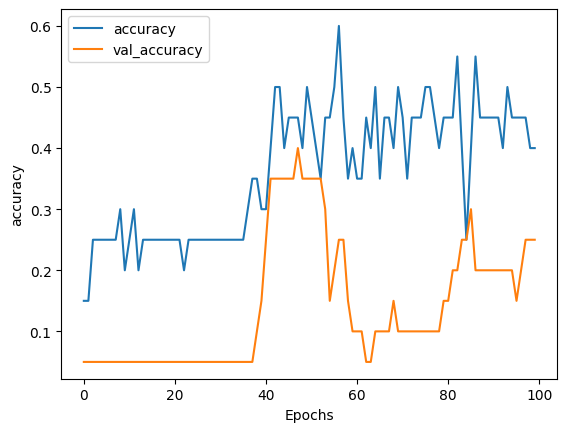

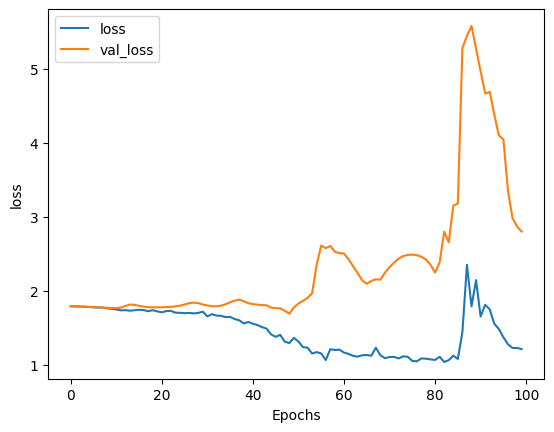

In [14]:
## Plottingan akurasi dan los
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:

df_train['label'].unique()

['label' 'happy' 'anger' 'fear' 'sadness' 'love']


In [18]:
## prediksi test_data
print(df_train['label'].unique())
pred = model.predict(test_padded)
classes = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

for i in range(10):
    print(test_sentences[i])
    print(classes[np.argmax(pred[i])])
    print()

['label' 'happy' 'anger' 'fear' 'sadness' 'love']
10/10 [==============================] - 1s 62ms/step
tweet
anger

ini adalah hal yang paling bahagia saat bias foto sama elf returnofthelittleprince happyheechulday
sadness

username username dari pertama username duduk bangku jabat anda rakyat belum pernah dengar dan lihat hasil kerja dan prestasi nyata yang anda ikan masa duduk bangku jabat coba tanya kenapa username abdi rakyat butuh seoran
anger

yaudah kalo emang belum berani potong rambut pendek ya nanti aja kalo emang udah yakin dan bisa nyaman selamat istirahat jangan lupa doa tidur yg nyenyak mimpi yg indah good night cit
anger

jadi malam gw rekap eh inti yg gw usahain kerja nyata zero samsek presentasi jam 16 00 ku baru grasak grusuk jam 13 23 jiaaaaaaann
anger

temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara rasa semua statement ku di sosmed pasti yang sangkal orang2 kek gitu parah lagi kalo mereka pacar bangsat
an

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_padded)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(Encode_label_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
cm

10/10 [==============================] - 2s 167ms/step


array([[63,  0,  0,  0, 13,  0],
       [25,  0,  0,  0, 19,  0],
       [55,  0,  0,  0, 15,  0],
       [ 1,  0,  0,  0,  0,  0],
       [23,  0,  0,  0, 21,  0],
       [47,  0,  0,  0, 18,  0]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(classification_report(y_true, y_pred,target_names=classes))

              precision    recall  f1-score   support

       anger       0.29      0.83      0.43        76
        fear       0.00      0.00      0.00        44
         joy       0.00      0.00      0.00        70
        love       0.00      0.00      0.00         1
     sadness       0.24      0.48      0.32        44
    surprise       0.00      0.00      0.00        65

    accuracy                           0.28       300
   macro avg       0.09      0.22      0.13       300
weighted avg       0.11      0.28      0.16       300



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
